# Sentiment analysis using reddit


In [1]:
pip install praw


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\tejap\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Importing praw 


In [2]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="lvnzs8-qJr-J5-4GcRq1Yg",
    client_secret="L5xMpuZ4WHh4CIh3Vs2grKs1hMgL1g",
    user_agent=user_agent
)

In [3]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

C:\Users\tejap\AppData\Local\Temp\ipykernel_7160\3422756113.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Selecting a new trending topic

In [4]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
16bm9de
BitcoinFan7
1694011779.0
199
0.94
https://www.reddit.com/r/Bitcoin/comments/16bm9de/bitcoin_newcomers_faq_please_read/
0


In [5]:
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

785


# Create a data frame

In [6]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,Getting started
1,Dips before the Halvings
2,Sparrow Wallet Questions
3,"Daily Discussion, February 01, 2024"
4,"Question about recovering BTC ""trapped"" in Ele..."


In [7]:
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

In [8]:
bitcoin_df.columns = ['Titles']

In [9]:
bitcoin_df.head()

,Titles
0,Getting started
1,Dips before the Halvings
2,Sparrow Wallet Questions
3,"Daily Discussion, February 01, 2024"
4,"Question about recovering BTC ""trapped"" in Ele..."


In [10]:
bitcoin_df.Titles.duplicated().sum() 

0

# Create a function to clean the tweets

In [11]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,Getting started
1,Dips before the Halvings
2,Sparrow Wallet Questions
3,"Daily Discussion, February 01, 2024"
4,"Question about recovering BTC ""trapped"" in Ele..."


In [12]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,Getting started
1,Dips before the Halvings
2,Sparrow Wallet Questions
3,"Daily Discussion, February 01, 2024"
4,"Question about recovering BTC ""trapped"" in Ele..."


In [13]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     ----- ------------------------------- 92.2/636.8 kB 581.0 kB/s eta 0:00:01
     ------ ----------------------------- 112.6/636.8 kB 726.2 kB/s eta 0:00:01
     ---------------- --------------------- 276.5/636.8 kB 1.2 MB/s eta 0:00:01
     ----------------------- -------------- 389.1/636.8 kB 1.5 MB/s eta 0:00:01
     ----------------------- -------------- 399.4/636.8 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\tejap\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Sentimental analyisis

In [14]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [15]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,Getting started,0.000000,0.000000
1,Dips before the Halvings,0.000000,0.000000
2,Sparrow Wallet Questions,0.000000,0.000000
3,"Daily Discussion, February 01, 2024",0.000000,0.000000
4,"Question about recovering BTC ""trapped"" in Ele...",0.291667,0.058333


In [16]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Getting started,0.000000,0.000000,Neutral
1,Dips before the Halvings,0.000000,0.000000,Neutral
2,Sparrow Wallet Questions,0.000000,0.000000,Neutral
3,"Daily Discussion, February 01, 2024",0.000000,0.000000,Neutral
4,"Question about recovering BTC ""trapped"" in Ele...",0.291667,0.058333,Positive
5,Holding 2 bitcoin in Robinhood crypto. Move it...,1.000000,-0.600000,Negative
6,"What is mining difficulty, really?",0.200000,0.200000,Positive
7,Earth to Satashi...,0.000000,0.000000,Neutral
8,"Bitcoin this week, in 6 minutes",0.000000,0.000000,Neutral
9,Alaska And Florida Hit Binance US with Cease O...,0.000000,0.000000,Neutral


In [17]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

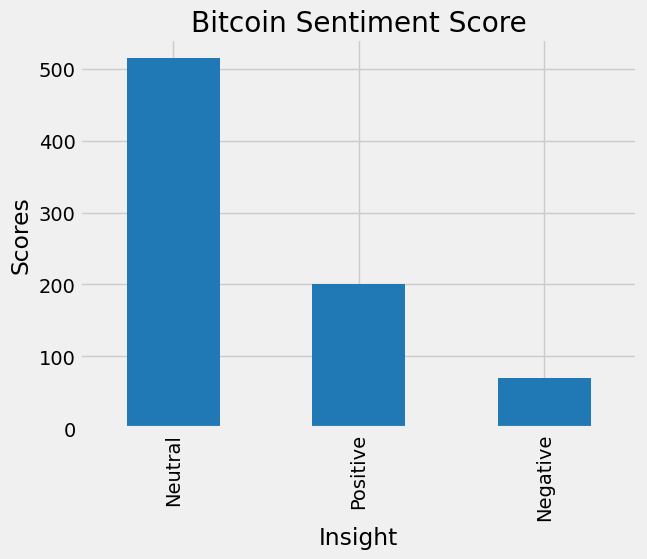

In [18]:
#Plot the values count of sentiment
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Generating word cloud

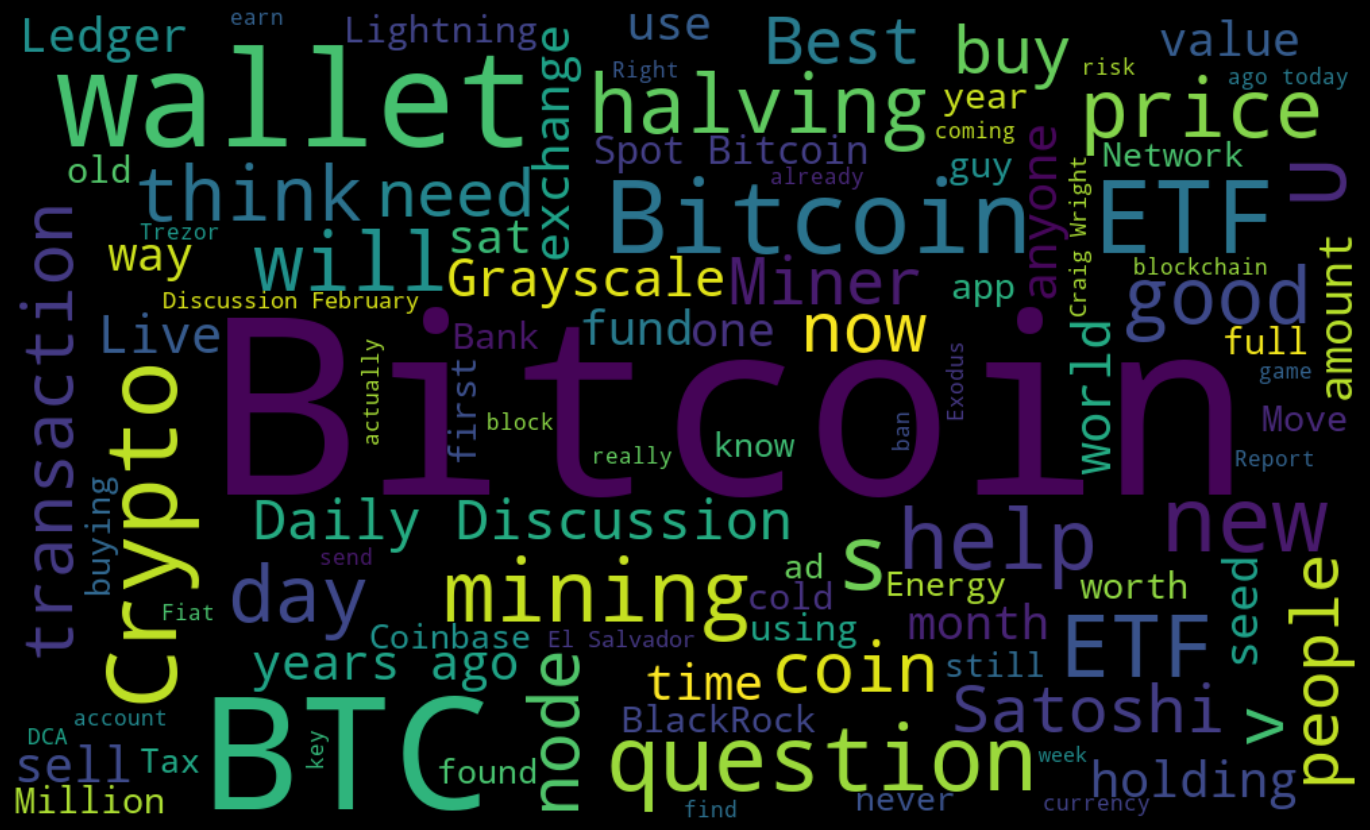

In [19]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");